# Random Forest Classifier with Feature Selection
### In this tutorial we will:

* Prepare the dataset
* Train a random forest classifier
* Identify the most important features
* Create a new ‘limited featured’ dataset containing only those features
* Train a second classifier on this new dataset
* Compare the accuracy of the ‘full featured’ classifier to the accuracy of the ‘limited featured’ classifier

### Import the libraries needed

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

### Gather our data

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
list(iris.target_names)

[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

In [3]:
# Create a list of feature names
feat_labels = ['Sepal Length','Sepal Width','Petal Length','Petal Width']

# Create X from the features
X = iris.data

# Create y from output
y = iris.target

In [4]:
# View the features
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
# View the target data
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Split data into training and test sets

In [8]:
# Split the data into 40% test and 60% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [9]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('Sepal Length', np.float64(0.11170442862975495))
('Sepal Width', np.float64(0.014471544662278471))
('Petal Length', np.float64(0.44802181155247256))
('Petal Width', np.float64(0.42580221515549405))


### Train and fit a Random Forest classifier

In [10]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.15)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                                 random_state=0),
                threshold=0.15)

## Identify and select the most important features

In [11]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

Petal Length
Petal Width


## Start over with a new dataset that contains only the most important features

In [12]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [13]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

## Compare the accuracy of using every feature to our limited feature classifier

In [14]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

0.9333333333333333

In [15]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test, y_important_pred)

0.8833333333333333

## Assess the performance difference:
### For a small reduction in accuracy, the number of features was reduced from 4 down to only 2. This improves processing and memory resources, and perhaps more importantly, makes the model more likely to scale well to larger datasets.

/var/folders/yz/hsrf3lt160v19ysdx2tqrdwm0000gr/T/ipykernel_86477/2942471768.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


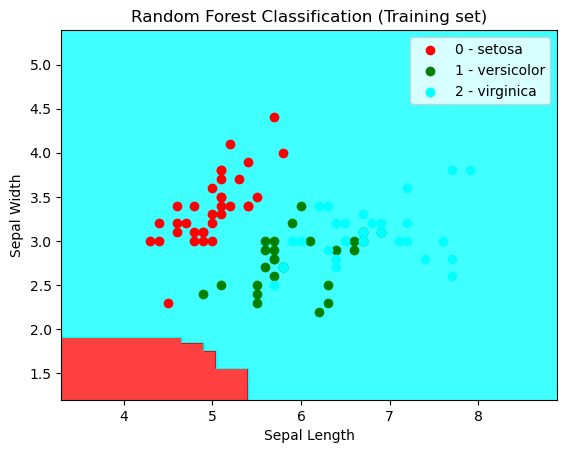

In [16]:
from matplotlib.colors import ListedColormap
colors = ('red','greeen','cyan')
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf_important.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','cyan'))(i), label = str(j) + ' - ' + iris.target_names[j])
plt.title('Random Forest Classification (Training set)')
plt.xlabel(feat_labels[0])
plt.ylabel(feat_labels[1])
plt.legend()
plt.show()